### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### Run with crabs

In [2]:
# Define study
STUDY_NAME = "opt_collapse_1100_1500_oct_scan"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
#df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df

normalized amplitude in xy-plane  \
beam  qx     qy     i_oct_b1 i_oct_b2                                     
lhcb1 62.305 60.310 -600.0   -600.0                               4.344   
                    -500.0   -500.0                               4.375   
                    -400.0   -400.0                               4.781   
                    -300.0   -300.0                               4.469   
                    -200.0   -200.0                               4.406   
...                                                                 ...   
      62.329 60.334  200.0    200.0                               2.000   
                     300.0    300.0                               2.000   
                     400.0    400.0                               2.000   
                     500.0    500.0                               2.000   
                     600.0    600.0                               2.000   

                                           qx      qy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb1 62.305 60.310 -600.0   -600.0    62.305  60.310        89.0        86.0   
                    -500.0   -500.0    62.305  60.310        89.0        86.0   
                    -400.0   -400.0    62.305  60.310        89.0        86.0   
                    -300.0   -300.0    62.305  60.310        89.0        86.0   
                    -200.0   -200.0    62.305  60.310        89.0        86.0   
...                                       ...     ...         ...         ...   
      62.329 60.334  200.0    200.0    62.329  60.334        89.0        86.0   
                     300.0    300.0    62.329  60.334        89.0        86.0   
                     400.0    400.0    62.329  60.334        89.0        86.0   
                     500.0    500.0    62.329  60.334        89.0        86.0   
                     600.0    600.0    62.329  60.334        89.0        86.0   

                                       num_particles_per_bunch  i_oct_b1  \
beam  qx     qy     i_oct_b1 i_oct_b2                                      
lhcb1 62.305 60.310 -600.0   -600.0               1.400000e+11    -600.0   
                    -500.0   -500.0               1.400000e+11    -500.0   
                    -400.0   -400.0               1.400000e+11    -400.0   
                    -300.0   -300.0               1.400000e+11    -300.0   
                    -200.0   -200.0               1.400000e+11    -200.0   
...                                                        ...       ...   
      62.329 60.334  200.0    200.0               1.400000e+11     200.0   
                     300.0    300.0               1.400000e+11     300.0   
                     400.0    400.0               1.400000e+11     400.0   
                     500.0    500.0               1.400000e+11     500.0   
                     600.0    600.0               1.400000e+11     600.0   

                                       i_oct_b2  
beam  qx     qy     i_oct_b1 i_oct_b2            
lhcb1 62.305 60.310 -600.0   -600.0      -600.0  
                    -500.0   -500.0      -500.0  
                    -400.0   -400.0      -400.0  
                    -300.0   -300.0      -300.0  
                    -200.0   -200.0      -200.0  
...                                         ...  
      62.329 60.334  200.0    200.0       200.0  
                     300.0    300.0       300.0  
                     400.0    400.0       400.0  
                     500.0    500.0       500.0  
                     600.0    600.0       600.0  

[304 rows x 8 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-600,600,13)

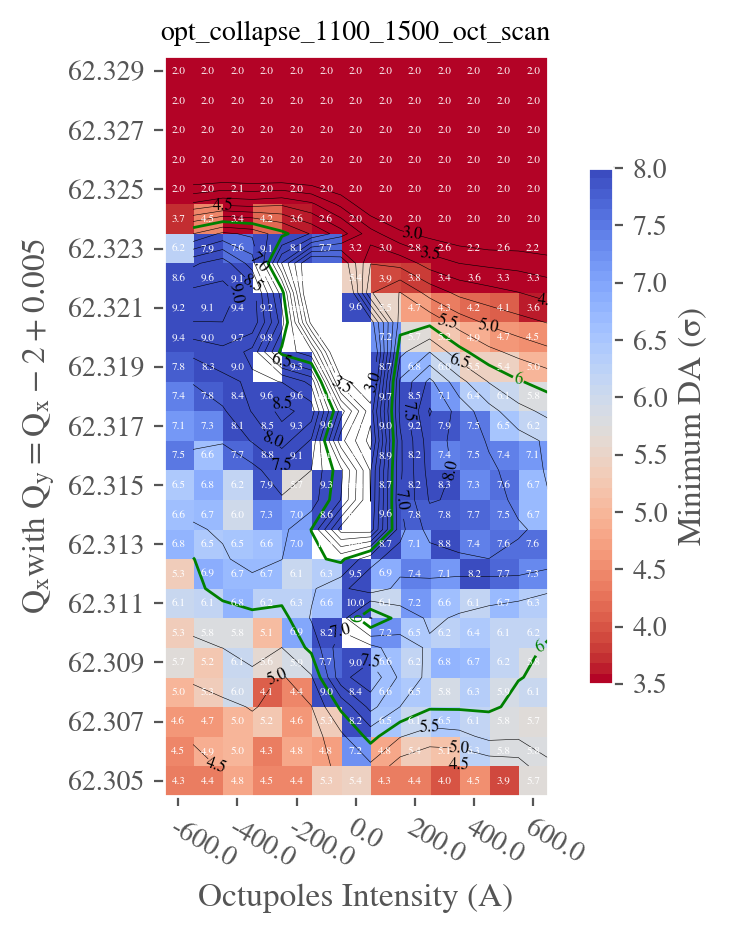

In [6]:
df_to_plot.columns = [str(oct) for oct in l_oct]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    title="opt_collapse_1100_1500_oct_scan",
)